<a href="https://colab.research.google.com/github/AndrewSlutsky/DA/blob/main/DA_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Генерація даних 

In [140]:
np.random.seed(0)
num_points = 100
a = 2
b = 8
noise = np.random.normal(0, 1, num_points)
x = np.random.uniform(0, 5, num_points)
y = a * x + b + noise

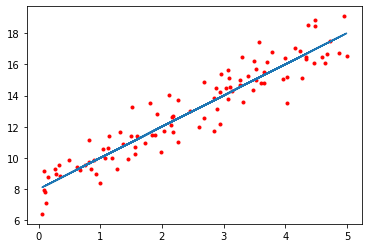

In [141]:
plt.scatter(x, y, marker = '.', color = 'r')
plt.plot()
plt.plot(x, a * x + b)

In [142]:
x = np.resize(x, (2, 100))
x[0] = 1

Realisation cost function for linear regression

In [143]:
def cost_f(m, h_x, y):
  return np.sum((h_x - y)**2)/(2*m)

calculating gradient of cost function

In [144]:
def nabla_j(m, h_x, y, x):
  j = np.zeros(2)
  temp = 0;
  j[0] = np.sum((h_x-y))/m
  for i in range(m):
    temp +=(h_x[i] - y[i])*x[1][i]
  j[1] = temp/m
  return j


In [145]:
def h(x, theta):
  return theta.dot(x)

finding arg min of cost function and printing the theta 

In [146]:
alpha = 0.1
m = 100
theta = np.zeros(2)
i = 1000
J = cost_f(m, h(x, theta), y)
while i > 0:
  theta = theta - alpha * nabla_j(m, h(x, theta), y, x)
  J = cost_f(m, h(x, theta), y)
  i -= 1
print(J)
print(theta)

0.5076770064825231
[8.09772262 1.98467056]


generation of date for logistic regression

In [147]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

In [148]:
mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

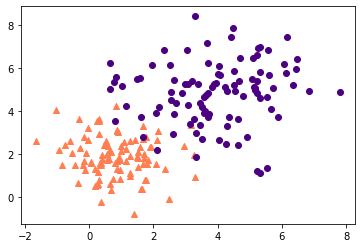

In [149]:
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='coral')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = 'o', color='indigo')

sigmoid function

In [150]:
def p(x, theta):
  return 1/ (1 + np.exp(h(x, theta)))

cost func(logg loss)

In [151]:
def cost_f_log(m, p, y):
  return np.sum(y*np.log(p) + (1 - y)* np.log(1-p))/(-1 * m)

gradient for logg loss

In [152]:
def nabla_f(m, p, y):
  j = np.zeros(3)
  temp = 0
  j[0] = np.sum((y - p))/m
  for i in range(m):
    temp +=(y[i] - p[i])*x[1][i]
  j[1] = temp/m
  temp = 0
  for i in range(m):
    temp +=(y[i] - p[i])*x[2][i]
  j[2] = temp/m
  return j

prepare data

In [153]:
y = np.concatenate((np.zeros(100),np.ones(100)), axis=0)
x = np.concatenate((x_1, x_2), axis=0)
x = x.T
x = np.resize(x, (3, 200))
x[0] = 1

calculating cost func and finding theta

In [154]:
alpha = 0.01
m = 200
theta = np.zeros(3)
i = 10000
J = cost_f_log(m, p(x, theta), y)
while i > 0:
  theta = theta - alpha * nabla_f(m, p(x, theta), y)
  J = cost_f_log(m, p(x, theta), y)
  i -= 1
print(J)
print(theta)

0.08976201961847498
[10.53286976 -2.13526524 -1.90483685]


function for classification test

In [155]:
def test(x, theta):
  ret = np.zeros(100)
  for i in range(100):
    temp = theta[0] + x[i][0]*theta[2] + x[i][1]*theta[1]
    if temp > 0:
      ret[i] = 0
    else:
      ret[i] = 1
  return ret


In [156]:
accuracy_score(np.zeros(100), test(x_1, theta))

0.96

In [157]:
accuracy_score(np.ones(100), test(x_2, theta))

0.96